## csv

In [1]:
import pandas as pd
df = pd.read_csv('customers.csv')

## HTML - 정규식으로 파싱하기

### 아이템매니아 당첨자 ID 추출
https://bit.ly/3rxQFS4
<br><img src=https://blog.kakaocdn.net/dn/bq6IEy/btrGEJXE3uh/mtaKfRIwGZf7ZhfZTMskXK/img.png width=700>

In [30]:
import re
import urllib.request

# 주어진 URL에 들어가서, html 읽어오기
url = "https://bit.ly/3rxQFS4"
html = urllib.request.urlopen(url)
html_contents= str(html.read().decode("utf8"))
print(f"[html_contents]\n\n {html_contents[:200]}..")

# findall로 [A-Za-z0-9]가 1개 이상(+)으로 이루어지고 뒤에 ***이 있는 ID들 모두 찾기
id_results = re.findall(r"([A-Za-z0-9]+\*\*\*)", html_contents)

print(f"\n찾은 ID들 개수: {len(id_results)}\n5개 ID 출력: {id_results[:5]}")

[html_contents]

 <!DOCTYPE html>
<html lang="ko">
<head>
    <title>아이템매니아</title>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
        <meta name="keywords" content="아이템매니아,아이템..

찾은 ID들 개수: 30
5개 ID 출력: ['codo***', 'outb7***', 'dubba4***', 'multicuspi***', 'crownm***']


### 구글 특허 zip 파일 추출
https://www.google.com/googlebooks/uspto-patents-grants-text.html
<br><img src=https://blog.kakaocdn.net/dn/Jjmjg/btrGE4UOc84/mXpsPNBPrbhFJH6nYJ26g0/img.png width=700>

In [37]:
import urllib.request # urllib.request 호출
import re

url = "https://www.google.com/googlebooks/uspto-patents-grants-text.html"
# url -> html_contents
html = urllib.request.urlopen(url) # url 열기
html_contents = str(html.read().decode("utf8")) # html.read()해서 utf8로 변환
print(f"[html_contents]\n\n {html_contents[:200]}..")

url_list = re.findall(r"(http)(.+)(zip)", html_contents)
print(url_list[:3])
url_list = list(map("".join,url_list))
print(f"\nurl_list\n{url_list[:5]}")

[html_contents]

 <!DOCTYPE html>
<html lang="en">
  <head>
    <meta http-equiv="content-type" content="text/html; charset=utf-8">
    <title>USPTO Patent Grant Full Text</title>
    <link rel="stylesheet" type="text/..
[('http', '://storage.googleapis.com/patents/grant_full_text/2015/ipg150106.', 'zip'), ('http', '://storage.googleapis.com/patents/grant_full_text/2015/ipg150113.', 'zip'), ('http', '://storage.googleapis.com/patents/grant_full_text/2015/ipg150120.', 'zip')]

url_list
['http://storage.googleapis.com/patents/grant_full_text/2015/ipg150106.zip', 'http://storage.googleapis.com/patents/grant_full_text/2015/ipg150113.zip', 'http://storage.googleapis.com/patents/grant_full_text/2015/ipg150120.zip', 'http://storage.googleapis.com/patents/grant_full_text/2015/ipg150127.zip', 'http://storage.googleapis.com/patents/grant_full_text/2015/ipg150203.zip']


### 네이버 금융 삼성전자 정보
http://finance.naver.com/item/main.nhn?code=005930
<br><img src=https://blog.kakaocdn.net/dn/ch64Ci/btrGEKWCkob/PTnLOoMBHQkkyDjrtEqgW1/img.png width=700>
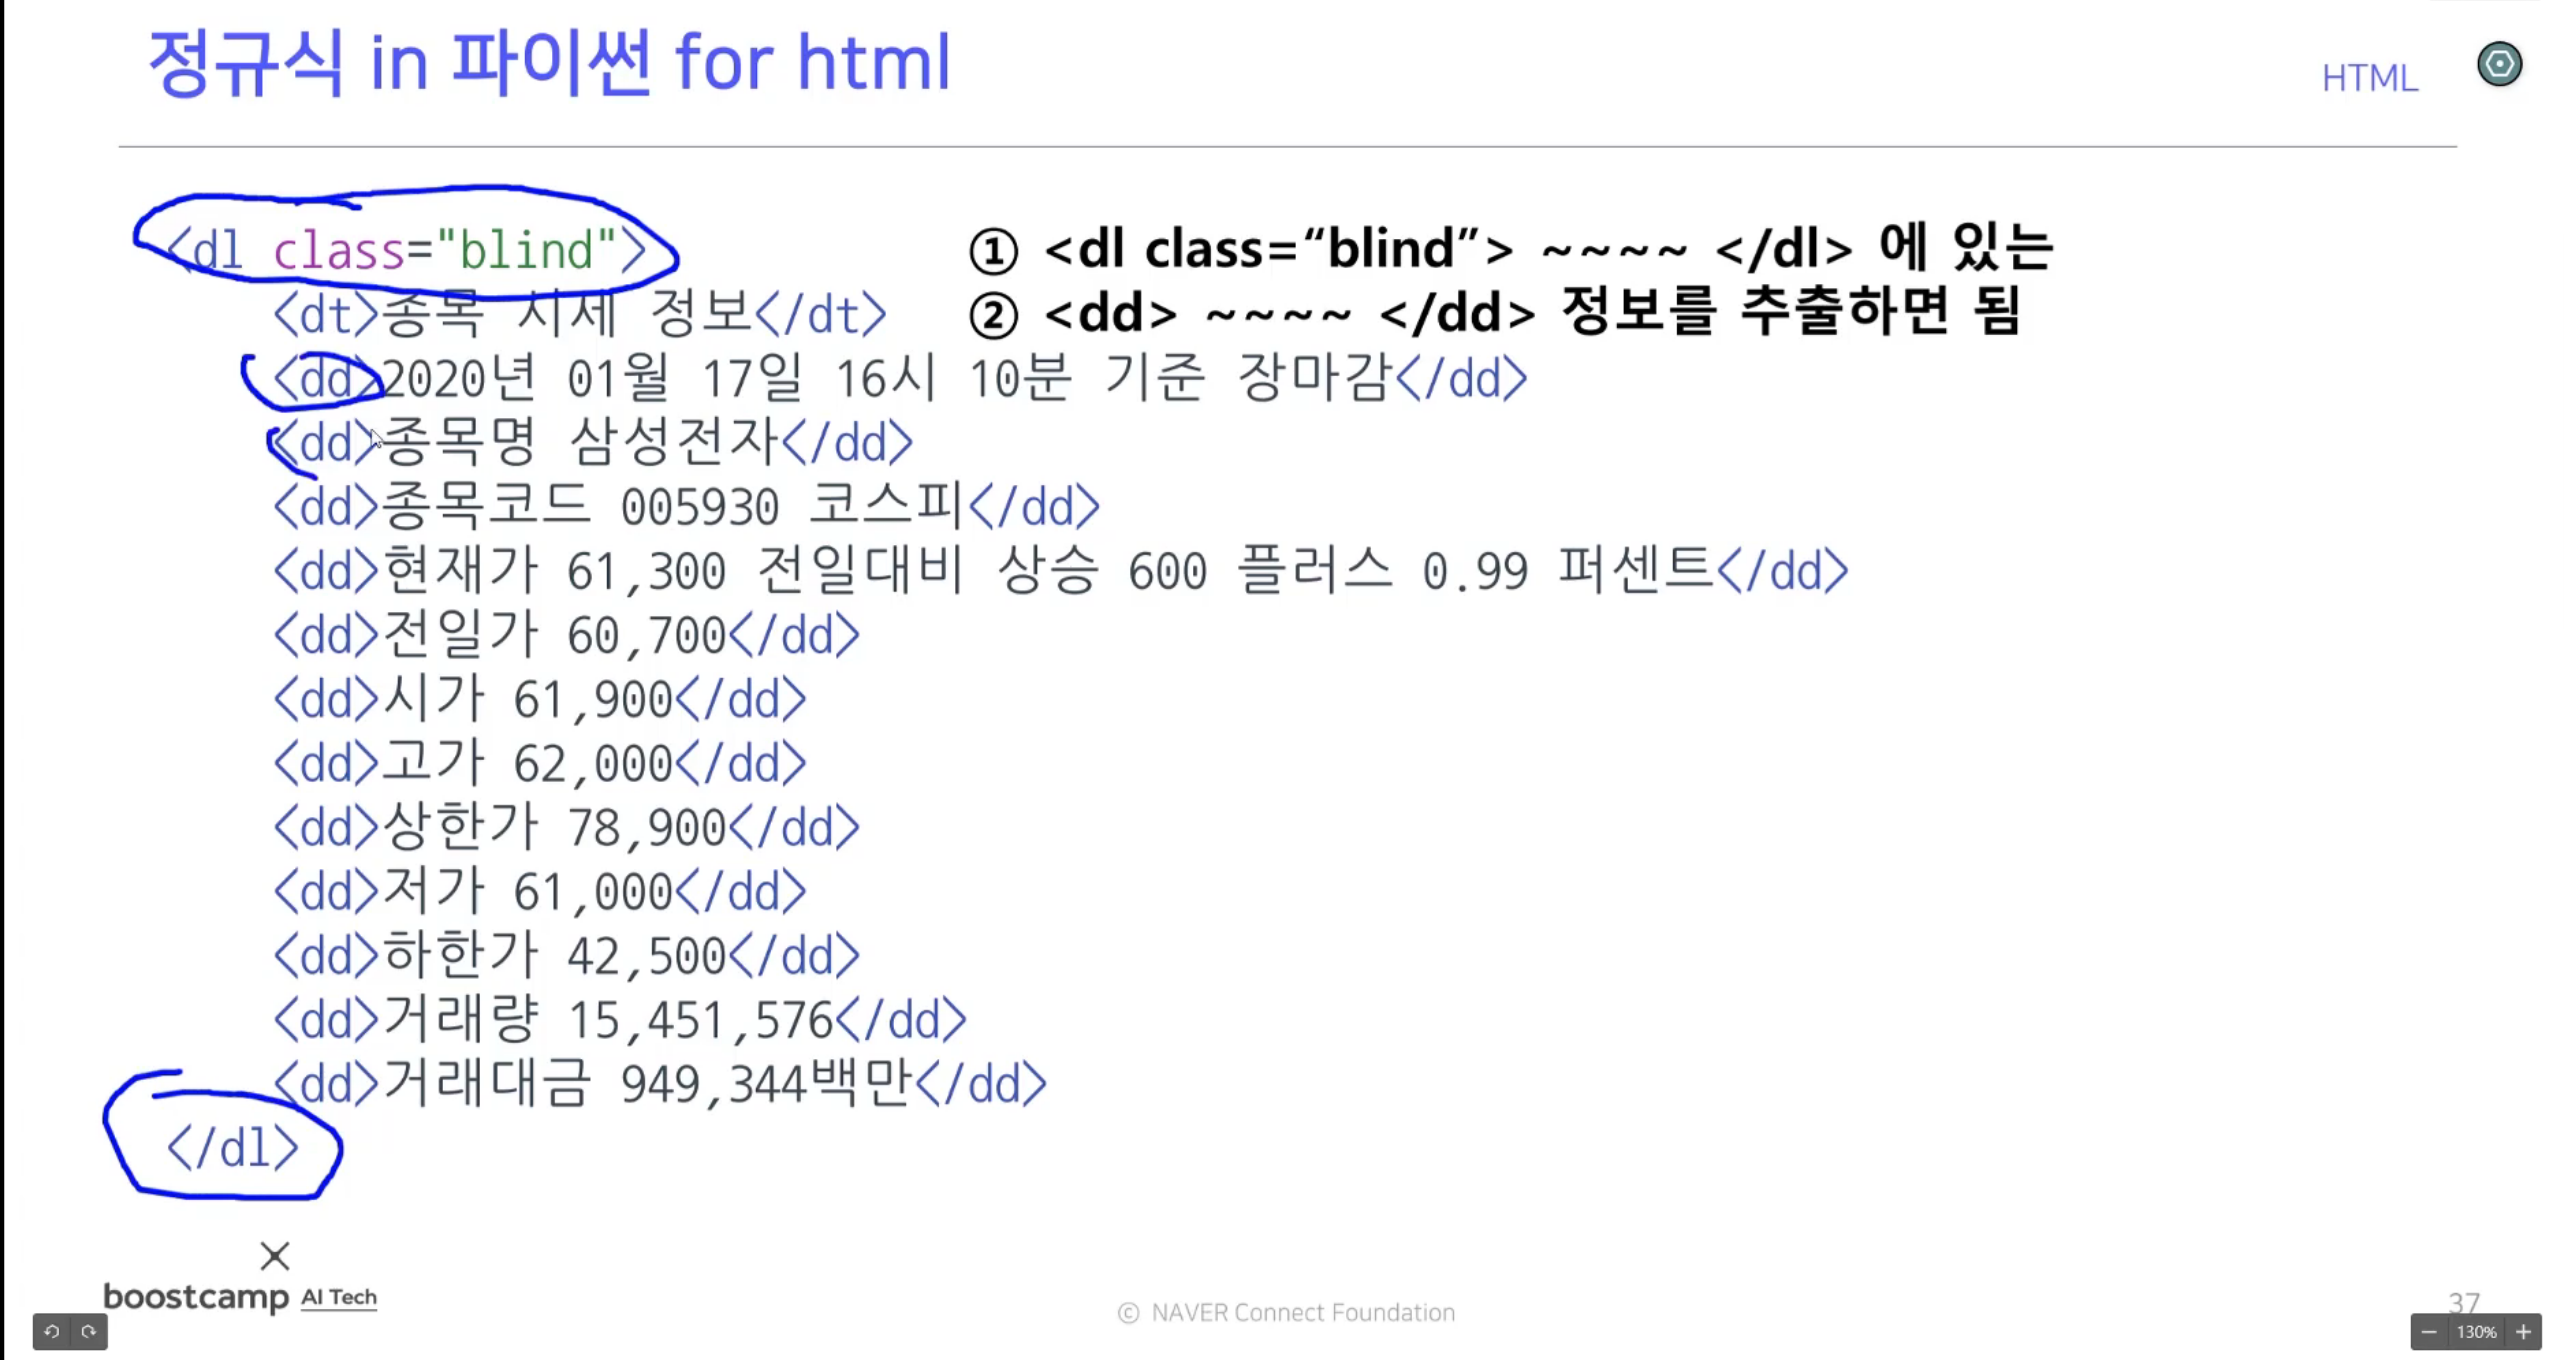

#### 네이버 금융 삼성전자 전체 코드

In [125]:
import urllib.request
import re

url = "http://finance.naver.com/item/main.nhn?code=005930"
html = urllib.request.urlopen(url)
html_contents = html.read().decode("ms949")

html_contents_head = html_contents[:50].replace("\n\n","")
print(f"[html_contents]{html_contents_head}..\n\n")
# \s: 공백문자, \S: 공백아닌 문자 -> 즉 모든 문자
stock_results = re.findall(r"(\<dl class=\"blind\"\>)([\s\S]+?)(\<\/dl\>)", html_contents)
samsung_stock = stock_results[0]
samsung_index = samsung_stock[1]
content_list = re.findall(r"(\<dd\>)([\s\S]+?)(\<\/dd\>)", samsung_index)

for c in content_list:
    print(c[1])

[html_contents]	
	
	
	
<html lang='ko'>
<head>
	
		<title>삼성전..


2022년 07월 06일 16시 11분 기준 장마감
종목명 삼성전자
종목코드 005930 코스피
현재가 56,400 전일대비 하락 800 마이너스 1.40 퍼센트
전일가 57,200
시가 57,300
고가 57,300
상한가 74,300
저가 56,400
하한가 40,100
거래량 16,742,796
거래대금 951,558백만


#### 개별 코드

In [77]:
import urllib.request
import re

url = "http://finance.naver.com/item/main.nhn?code=005930"
html = urllib.request.urlopen(url)
html_contents = html.read().decode("ms949")

html_contents_head = html_contents[:270].replace("\n\n","")
print(f"[html_contents]{html_contents_head}..")

[html_contents]	
	
	
	
<html lang='ko'>
<head>
	
		<title>삼성전자 : 네이버 금융</title>
	
		
	
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
	
<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content=..


<br><img src=https://blog.kakaocdn.net/dn/dj4KPB/btrGFKBR3Yo/dQlTnMgX16DRPeu4EZwLmK/img.png width=700>

In [91]:
# \s: 공백문자, \S: 공백아닌 문자 -> 즉 모든 문자
stock_results = re.findall(r"(\<dl class=\"blind\"\>)([\s\S]+?)(\<\/dl\>)", html_contents)

In [101]:
samsung_stock = stock_results[0]
samsung_index = samsung_stock[1]

In [102]:
samsung_index

'\n\t        <dt>종목 시세 정보</dt>\n\t        <dd>2022년 07월 06일 16시 11분 기준 장마감</dd>\n\t        <dd>종목명 삼성전자</dd>\n\t        <dd>종목코드 005930 코스피</dd>\n\t        <dd>현재가 56,400 전일대비 하락 800 마이너스 1.40 퍼센트</dd>\n\t        <dd>전일가 57,200</dd>\n\t        <dd>시가 57,300</dd>\n\t        <dd>고가 57,300</dd>\n\t        <dd>상한가 74,300</dd>\n\t        <dd>저가 56,400</dd>\n\t        <dd>하한가 40,100</dd>\n\t        <dd>거래량 16,742,796</dd>\n\t        <dd>거래대금 951,558백만</dd>\n        '

In [104]:
re.findall(r"(\<dd\>)([\s\S]+?)(\<\/dd\>)", samsung_index)

[('<dd>', '2022년 07월 06일 16시 11분 기준 장마감', '</dd>'),
 ('<dd>', '종목명 삼성전자', '</dd>'),
 ('<dd>', '종목코드 005930 코스피', '</dd>'),
 ('<dd>', '현재가 56,400 전일대비 하락 800 마이너스 1.40 퍼센트', '</dd>'),
 ('<dd>', '전일가 57,200', '</dd>'),
 ('<dd>', '시가 57,300', '</dd>'),
 ('<dd>', '고가 57,300', '</dd>'),
 ('<dd>', '상한가 74,300', '</dd>'),
 ('<dd>', '저가 56,400', '</dd>'),
 ('<dd>', '하한가 40,100', '</dd>'),
 ('<dd>', '거래량 16,742,796', '</dd>'),
 ('<dd>', '거래대금 951,558백만', '</dd>')]

## XML
1. HTML과 같이 구조적 markup 언어
2. 컴퓨터나 스마트폰간에 정보를 주고받기에 유용

In [161]:
import csv

In [ ]:
csv()

In [158]:
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
with open("books.xml","r", encoding='utf8') as books_file:
    books_xml = books_file.read() # File을 String으로 읽어오기

soup = BeautifulSoup(books_xml,"lxml") # lxml Parser를 사용해서 데이터 분석

# author가 들어간 모든 element 추출
for book_info in soup.find_all("author"):
    print(book_info)
    print(book_info.get_text())

<author>Carson</author>
Carson
<author>Sungchul</author>
Sungchul
